<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
df_social <- read.table("social.csv", header = T, sep = ',')
dim(df_social)
head(df_social)

[1] 5224    8

Response_id,Age,Gender,Media.app,Media.app.Other,Time.spent,Times.per.day,Posts
655696,62,Male,Facebook,,10,1.0,1
655698,4,Female,Facebook,,1,1.0,1
655708,25,Female,Facebook,,40,5.0,1
655715,19,Male,Facebook,,5,0.1,0
655717,20,Female,Twitter,,120,20.0,7
655719,17,Male,Twitter,,60,8.0,1


In [3]:
df_social_complete <- na.omit(df_social)
dim(df_social_complete)

[1] 5109    8

In [4]:
sum(is.na(df_social_complete))

[1] 0

In [5]:
df_social <- df_social_complete

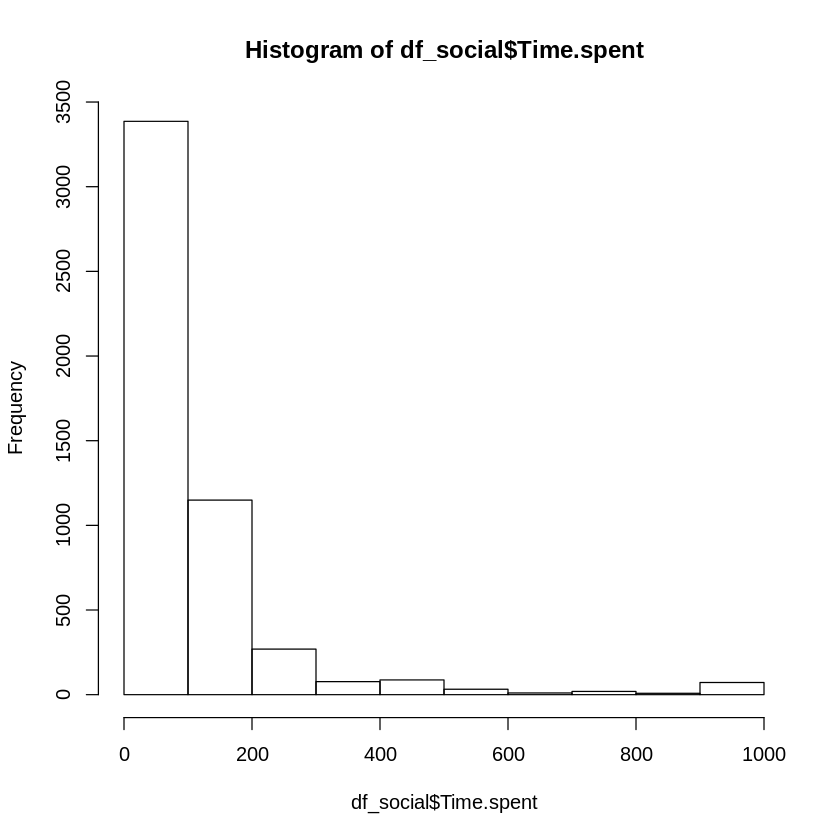

In [6]:
hist(df_social$Time.spent)

In [7]:
df_social <- df_social[df_social$Time.spent > 0,]
dim(df_social)

[1] 4901    8

In [8]:
table(df_social$Gender)


       Female   Male  Other 
     0   2927   1904     70 

In [9]:
df_social <- df_social[df_social$Gender %in% c("Female", "Male"),]
dim(df_social)

[1] 4831    8

In [10]:
df_social$Gender <- factor(df_social$Gender, level = c("Female", "Male"))

In [11]:
table(df_social$Gender)


Female   Male 
  2927   1904 

In [12]:
table(df_social$Age, df_social$Gender)

      
       Female Male
  4         6    2
  4,5       1    0
  5         0    2
  9         0    1
  12        2    1
  13        1    0
  14        8    3
  15       24   14
  16       67   44
  16,5      1    0
  17      309  196
  18      501  298
  19      380  237
  20      268  182
  21      182  121
  22      105   83
  23      110   50
  24       71   47
  25       66   52
  25,5      0    1
  26       63   45
  27       48   29
  28       45   33
  29       35   28
  30       32   25
  31       20   14
  32       29   21
  33       25   22
  34       31   22
  35       31   21
  36       26   17
  37       32   21
  38       33   19
  39       18   17
  40       28   23
  41       23   15
  42       20   15
  43       22    6
  44       20   16
  45       21   17
  46       24   10
  47       23    9
  48       20   13
  49       12   10
  50       28   11
  51       18    6
  52       16    2
  53       11   11
  54       13    4
  55       10   10
  56       11    6
  57 

In [13]:
table(df_social$Gender)['Female'] / nrow(df_social)

Female 
0,6058787

In [14]:
cont_table <- table(df_social$Gender, df_social$Media.app)
cont_table

        
         Facebook Instagram Other Pinterest Snapchat Twitter
  Female     1034       666   106       110      762     249
  Male        662       357   146        18      479     242

In [15]:
apply(
    cont_table,
    2,
    function(col) {
        col['Female'] / sum(col)
    }
)

Facebook Instagram     Other Pinterest  Snapchat   Twitter 
0,6096698 0,6510264 0,4206349 0,8593750 0,6140210 0,5071283

In [16]:
colnames(cont_table) != 'Other'

[1]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE

In [17]:
chisq.test(cont_table[,colnames(cont_table) != 'Other'])


	Pearson's Chi-squared test

data:  cont_table[, colnames(cont_table) != "Other"]
X-squared = 62,273, df = 4, p-value = 9,65e-13


In [18]:
df_social$Time.spent.Log <- log(df_social$Time.spent, 10)
head(df_social)

Response_id,Age,Gender,Media.app,Media.app.Other,Time.spent,Times.per.day,Posts,Time.spent.Log
655696,62,Male,Facebook,,10,"1,0",1,"1,000000"
655698,4,Female,Facebook,,1,"1,0",1,"0,000000"
655708,25,Female,Facebook,,40,"5,0",1,"1,602060"
655715,19,Male,Facebook,,5,"0,1",0,"0,698970"
655717,20,Female,Twitter,,120,"20,0",7,"2,079181"
655719,17,Male,Twitter,,60,"8,0",1,"1,778151"


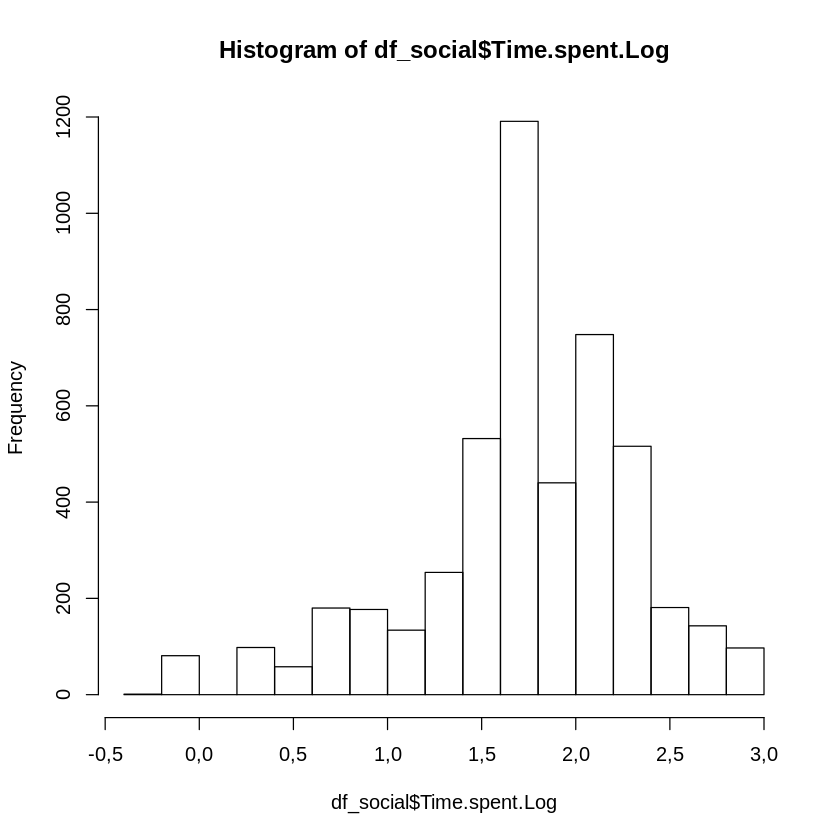

In [19]:
hist(df_social$Time.spent.Log)

In [20]:
library("ggplot2")

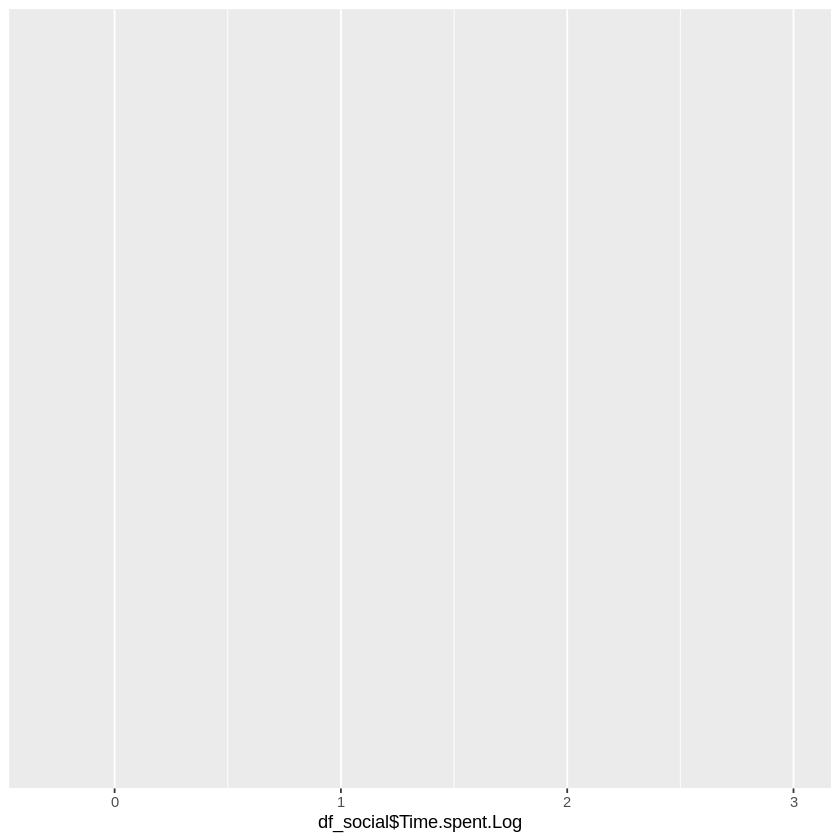

In [21]:
plt <- ggplot(
    data=df_social,
    mapping=aes(
        x=df_social$Time.spent.Log
    )
)

plt

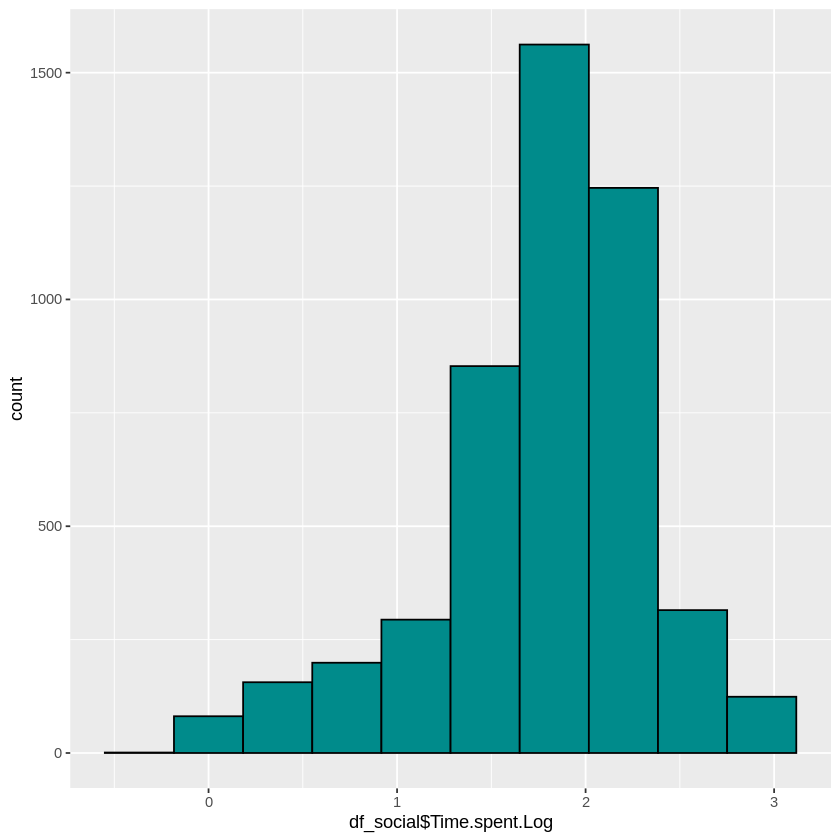

In [22]:
# http://sape.inf.usi.ch/quick-reference/ggplot2/colour

plt <- plt + geom_histogram(bins=10, color='black', fill='darkcyan')
plt

In [23]:
png('test.png', width = 500, height = 500)
print(plt)
dev.off()

png 
  2

In [24]:
ggsave('test2.png', width = 5, height = 5)

In [25]:
my_breaks <- seq(
    round(min(df_social$Time.spent.Log)),
    round(max(df_social$Time.spent.Log)),
    1
)

my_breaks

[1] 0 1 2 3

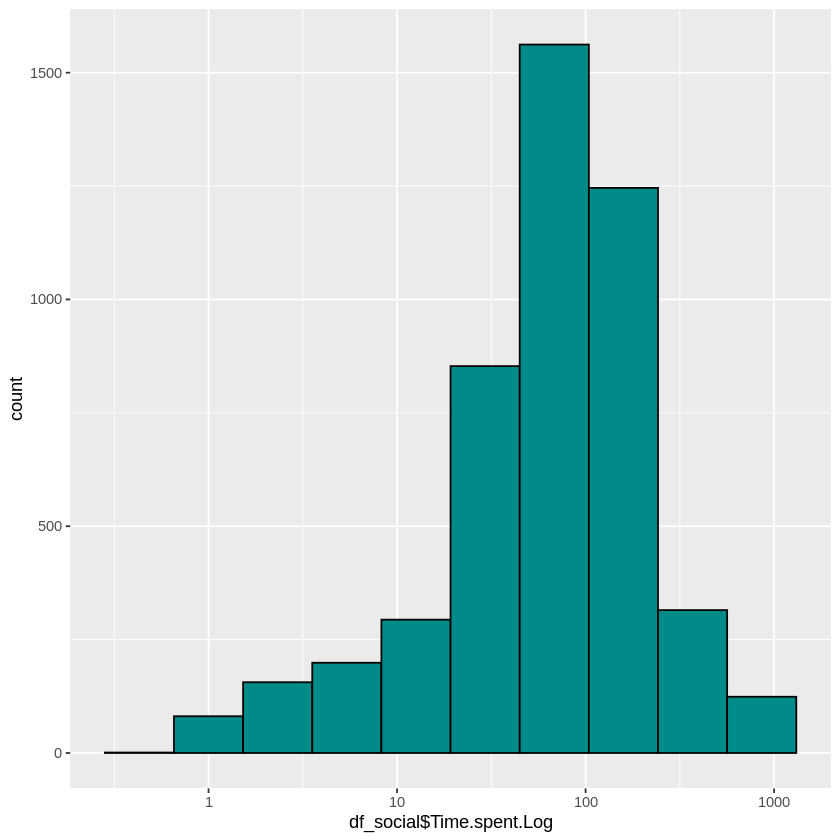

In [26]:
plt + scale_x_continuous(
    breaks=my_breaks,
    labels=10^my_breaks
)

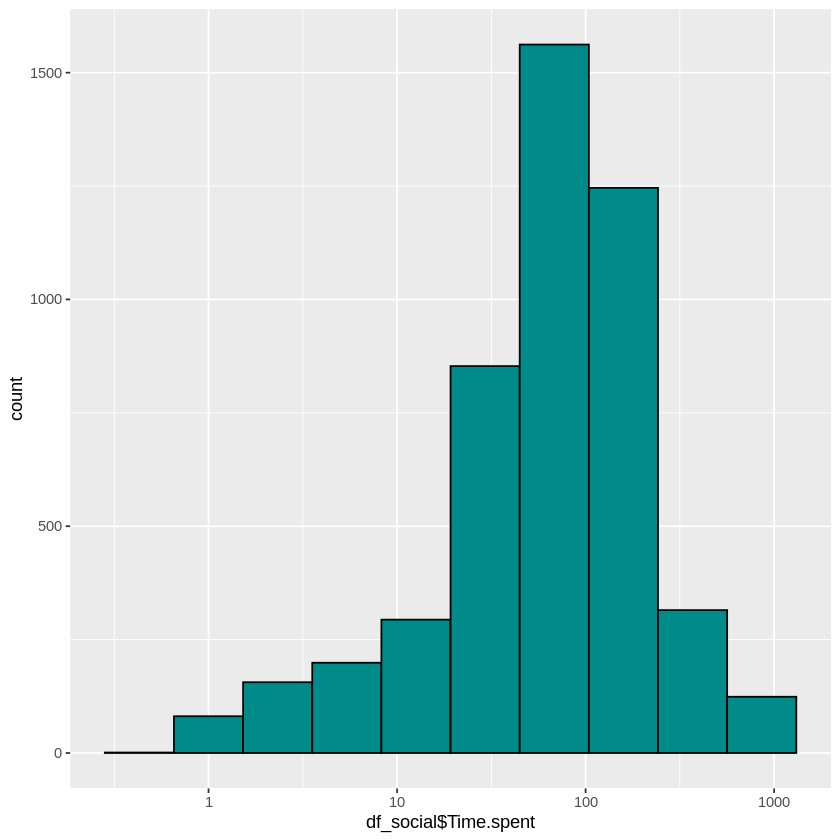

In [27]:
plt <- ggplot(
    df_social,
    aes(
        x=df_social$Time.spent
    )
) +
geom_histogram(
    bins=10, 
    color='black', 
    fill='darkcyan'
) + scale_x_log10()

plt

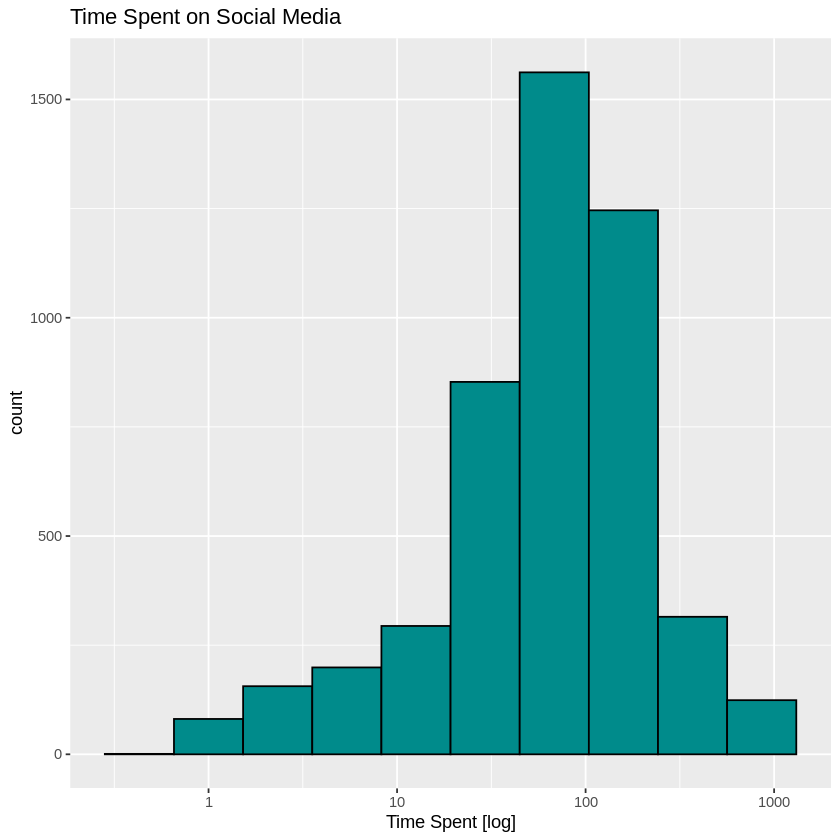

In [28]:
plt <- plt + xlab('Time Spent [log]') + ggtitle('Time Spent on Social Media')

plt

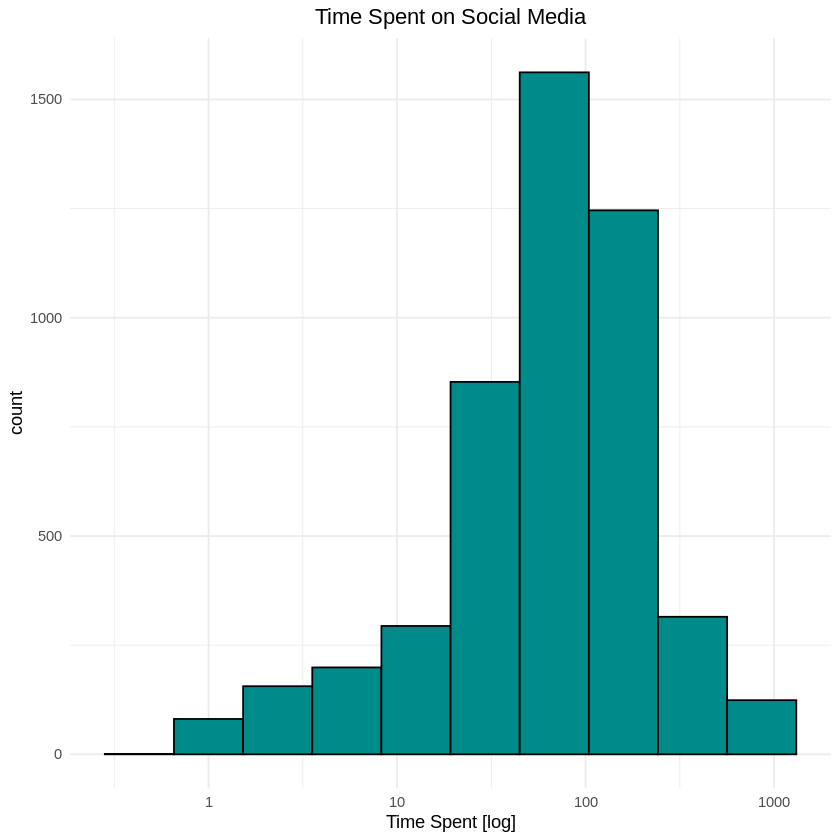

In [29]:
histogram_theme <- theme(
    plot.title = element_text(hjust = 0.5)
)

theme_mine <- function(title_hjust=0.5) {
    theme_minimal() + theme(plot.title = element_text(hjust = title_hjust))
}

plt + theme_mine()

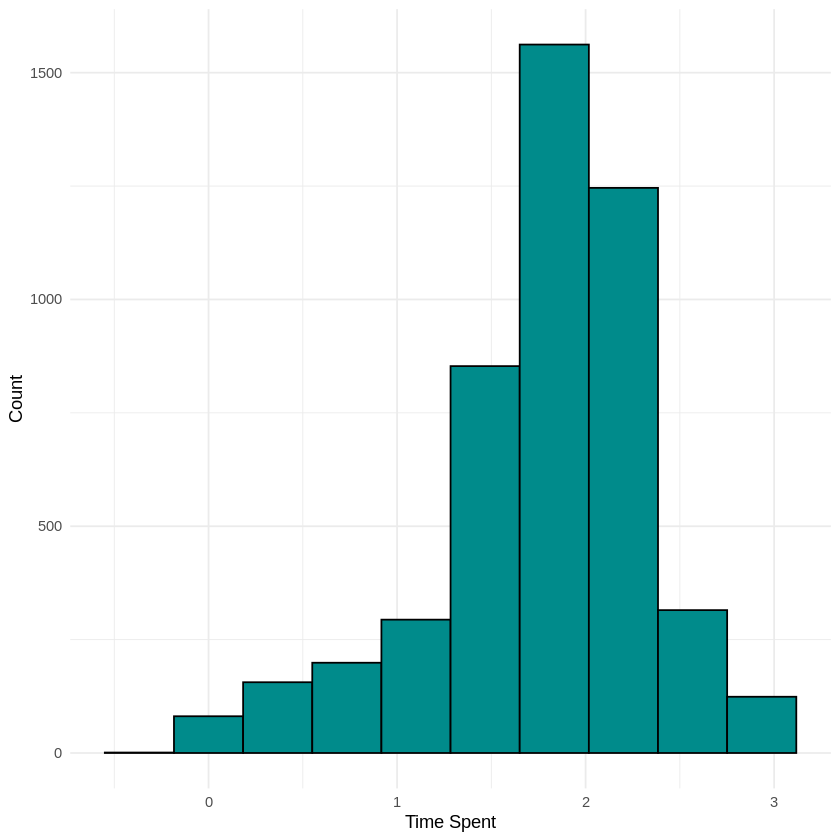

In [30]:
my_hist <- function(data, variable, bins = 10) {
    plt <- ggplot(
        data,
        aes(
            x=data[[variable]]
        )
    ) + geom_histogram(
        color='black',
        fill='darkcyan',
        bins=bins
    ) + labs(
        x=variable,
        y='Count'
    ) + theme_mine()
    
    return(plt)
}

my_hist(df_social, 'Time.spent.Log') + labs(x='Time Spent')

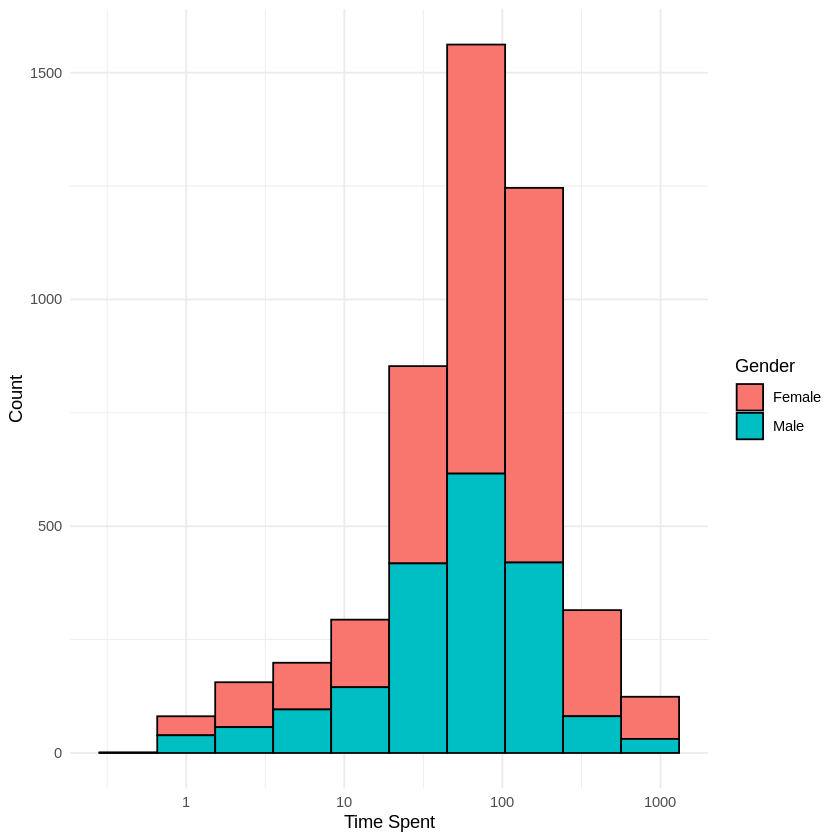

In [38]:
my_grouped_hist <- function(data, variable, group_variable, bins=10) {
    plt <- ggplot(
        data,
        aes(
            x=data[[variable]],
            fill=data[[group_variable]],
#             color=data[[group_variable]]
        )
    ) + geom_histogram(
        color='black',
#         fill='darkcyan',
        bins=bins
    ) + labs(
        x=variable,
        y='Count',
        fill=group_variable
    ) + theme_mine()
    
    return(plt)
}

my_grouped_hist(df_social, 'Time.spent', 'Gender') + scale_x_log10() + xlab('Time Spent')

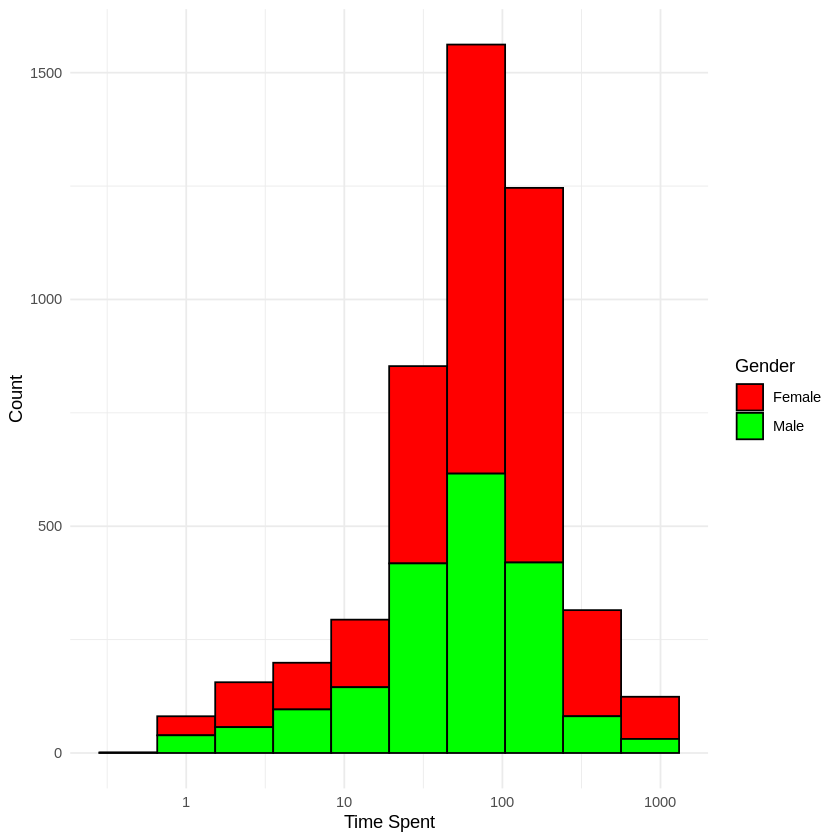

In [32]:
plt <- my_grouped_hist(df_social, 'Time.spent', 'Gender') + scale_x_log10() + xlab('Time Spent')

plt + scale_fill_manual(values=c('red', 'green', 'blue'))

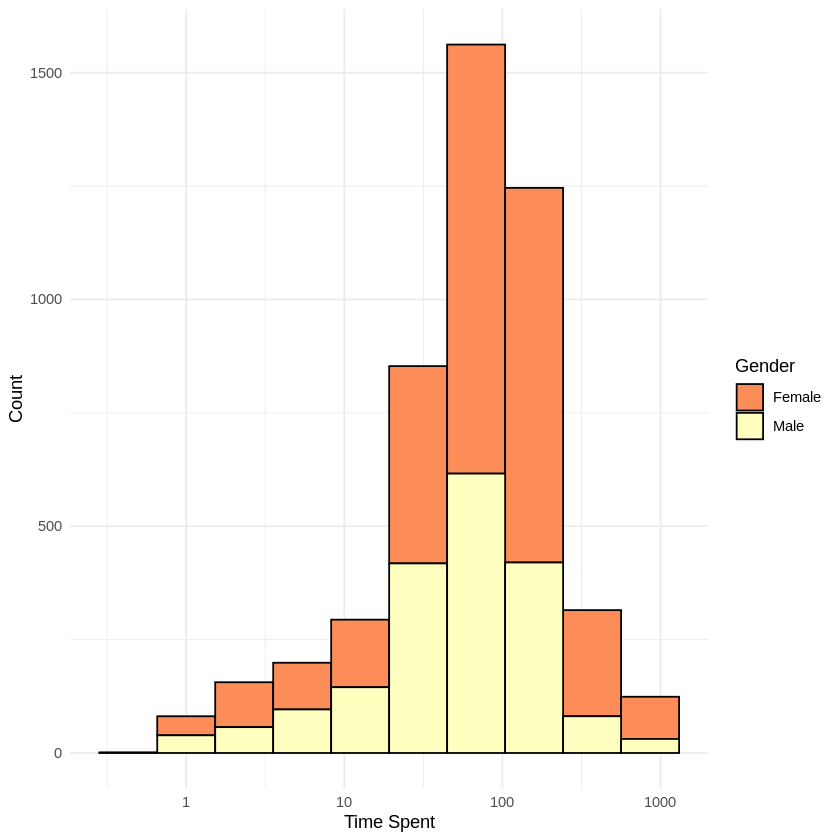

In [33]:
plt + scale_fill_brewer(palette = 'Spectral')

In [47]:
?density

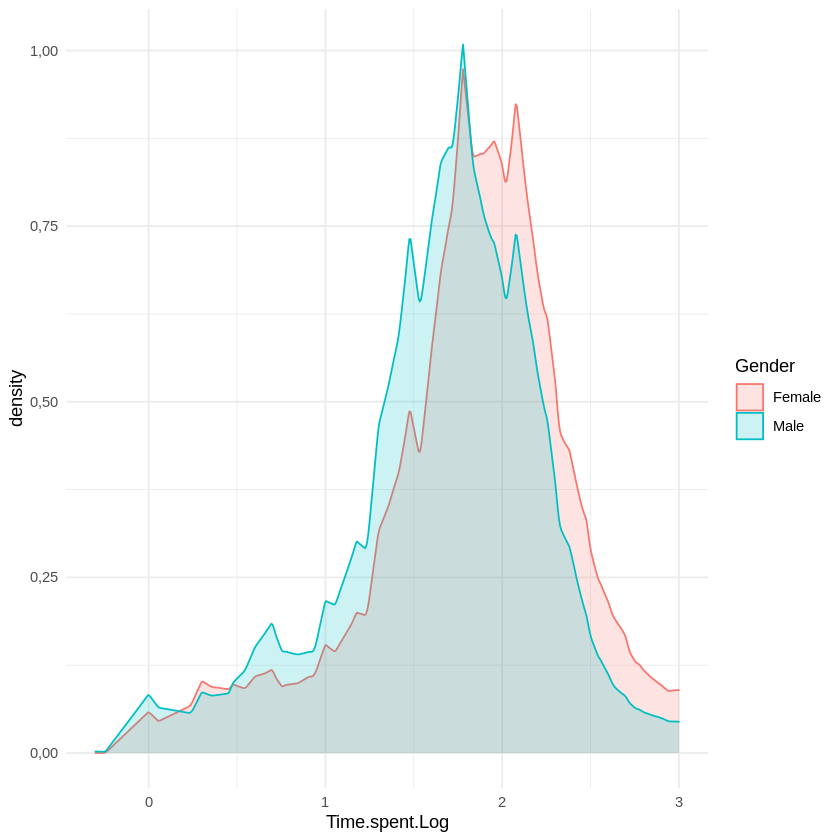

In [52]:
ggplot(
    df_social,
    aes(
        x = Time.spent.Log,
        fill = Gender,
        color = Gender
    )
) + geom_density(
    alpha=0.2,
    bw=0.1,
    kernel="triangular"
) + theme_mine()

In [54]:
fce <- function(data, col) {
    print('fce begin')
    
    col_name <- deparse(substitute(col)) # převod proměnné na jméno sloupce
    print(col_name)
    print(data[1:5,col_name])
    
    print('fce end')
}

fce(df_social, col = Time.spent)
head(df_social$Time.spent, 5)

[1] "fce begin"
[1] "Time.spent"
[1]  10   1  40   5 120
[1] "fce end"


[1]  10   1  40   5 120

In [55]:
substitute(a)
class(substitute(a))

a

[1] "name"

In [56]:
substitute(df_social)
class(substitute(df_social))

df_social

[1] "name"

In [57]:
substitute(df_social$Time.spent)
class(substitute(df_social$Time.spent))

df_social$Time.spent

[1] "call"

In [58]:
deparse(substitute(df_social$Time.spent))
class(deparse(substitute(df_social$Time.spent)))

[1] "df_social$Time.spent"

[1] "character"

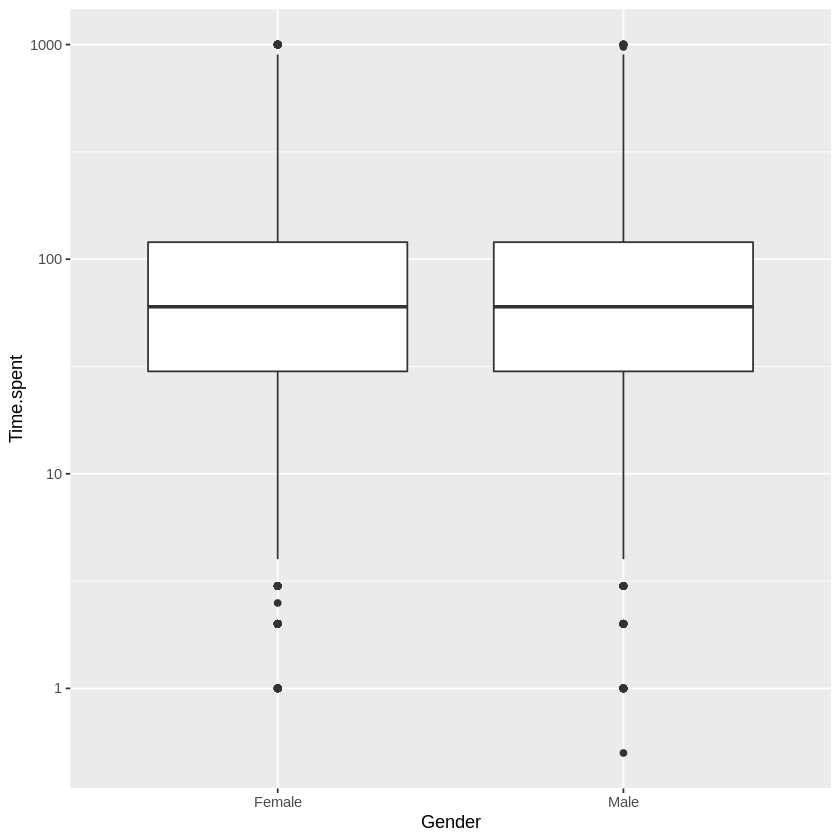

In [61]:
ggplot(
    df_social,
    aes(
        x = Gender,
        y = Time.spent
    )
) + scale_y_log10() + geom_boxplot()

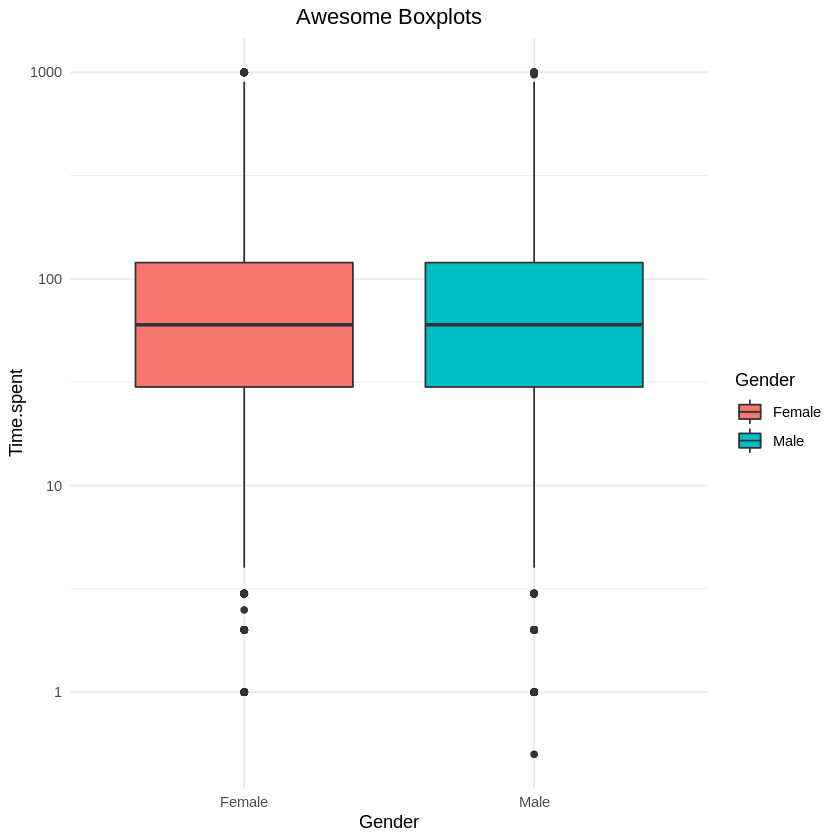

In [67]:
ggplot(
    df_social,
    aes(
        x = Gender,
        fill = Gender,
        y = Time.spent
    )
) + scale_y_log10() + geom_boxplot() + theme_mine() + labs(title='Awesome Boxplots')

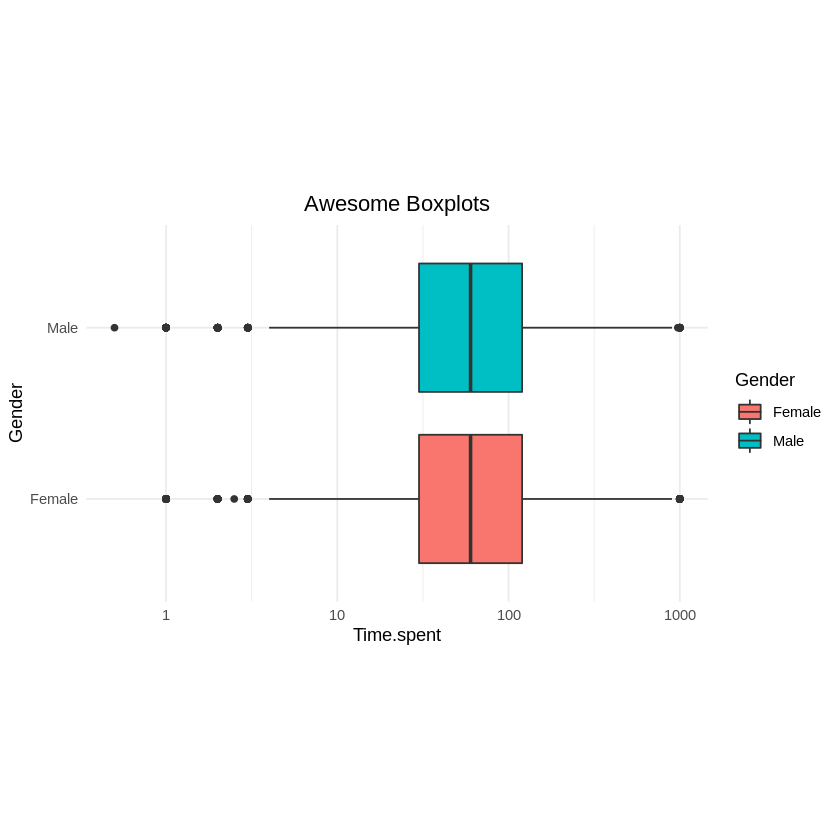

In [73]:
ggplot(
    df_social,
    aes(
        x = Time.spent,
        fill = Gender,
        y = Gender
    )
) + scale_x_log10() + geom_boxplot() + theme_mine() + labs(title='Awesome Boxplots') + coord_fixed(1)

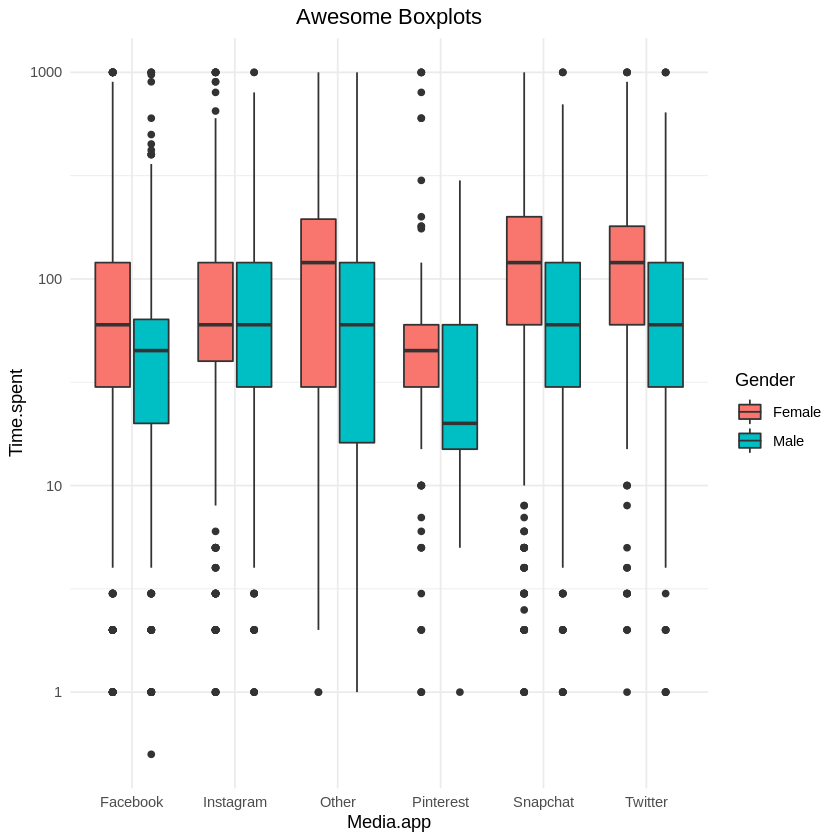

In [75]:
ggplot(
    df_social,
    aes(
        x = Media.app,
        fill = Gender,
        y = Time.spent
    )
) + scale_y_log10() + geom_boxplot() + theme_mine() + labs(title='Awesome Boxplots')

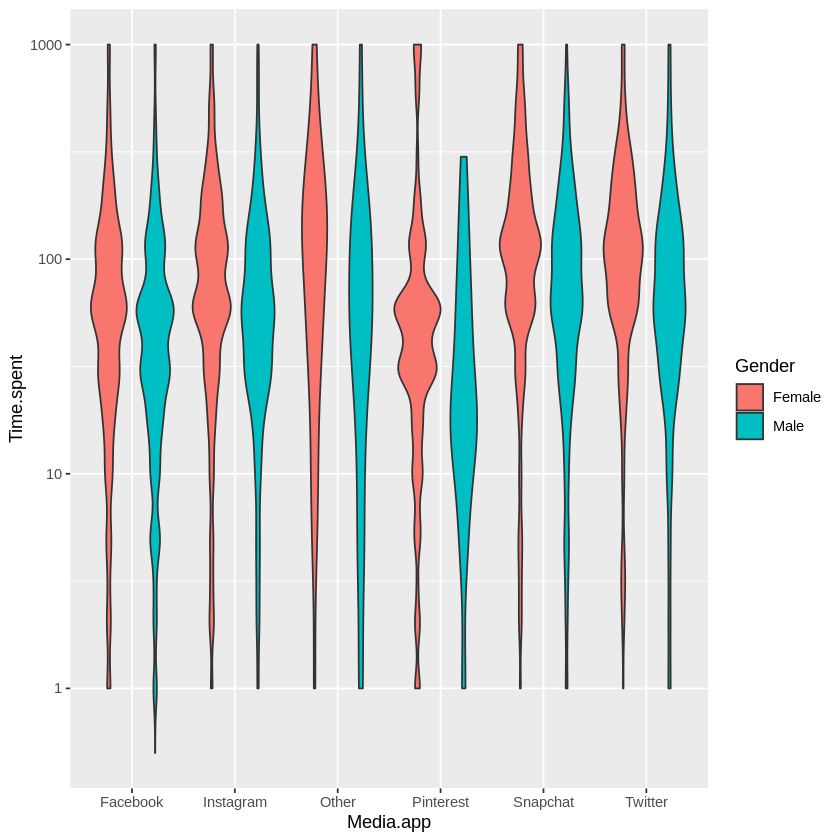

In [78]:
plt <- ggplot(
    df_social,
    aes(
        x = Media.app,
        fill = Gender,
        y = Time.spent
    )
) + scale_y_log10() + geom_violin()

plt

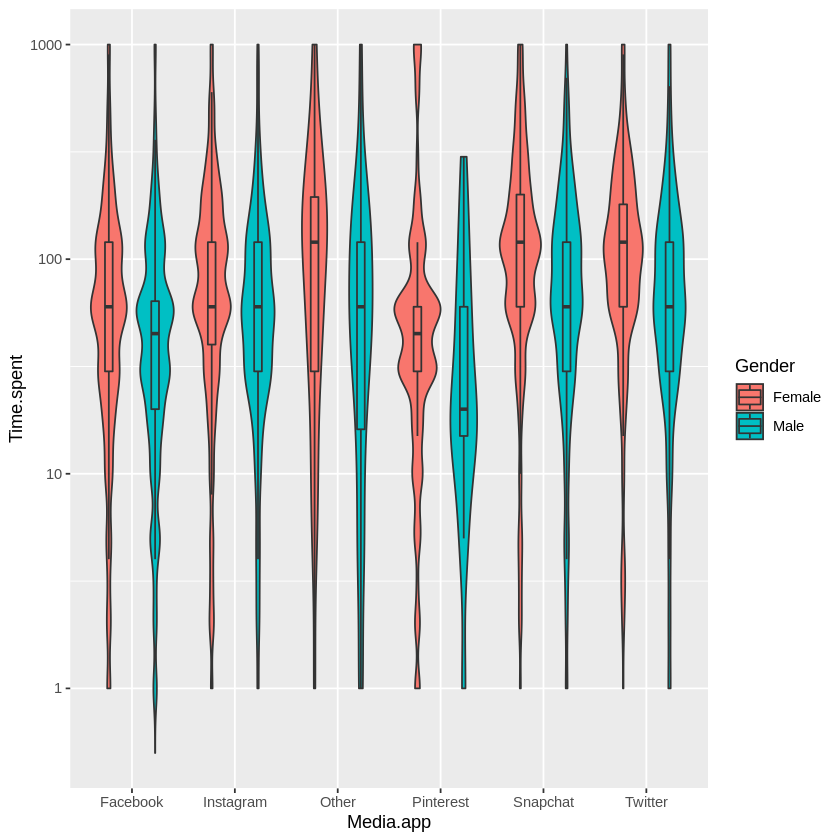

In [92]:
plt + geom_boxplot(
    width=0.15,
    position=position_dodge(width=0.9),
    outlier.color=NA
)

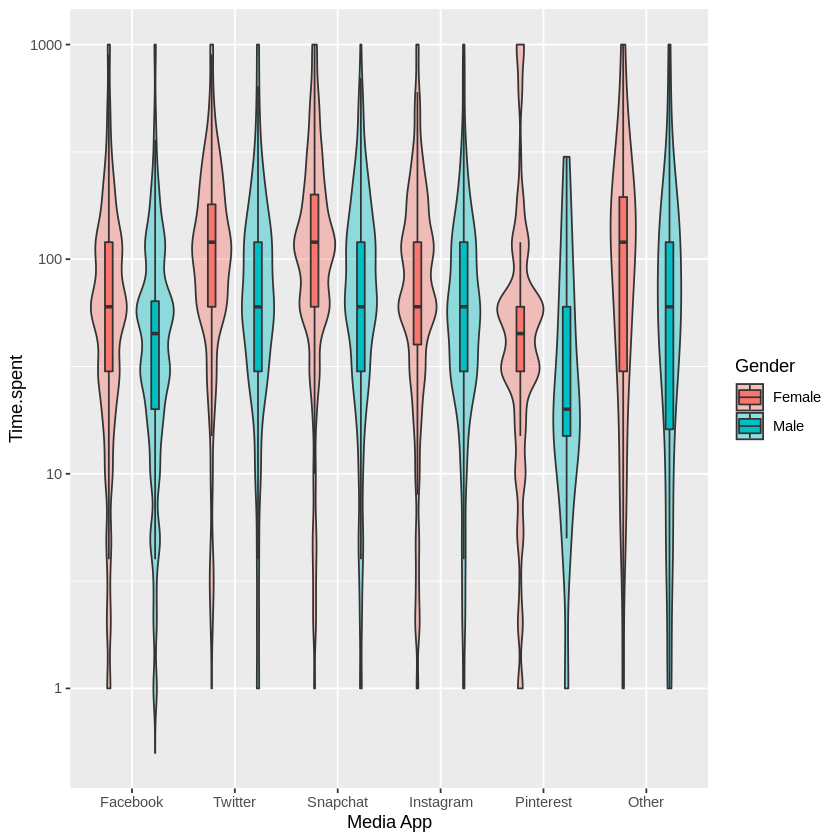

In [99]:
plt <- ggplot(
    df_social,
    aes(
        x = factor(df_social$Media.app, level=unique(df_social$Media.app)),
        fill = Gender,
        y = Time.spent
    )
) + scale_y_log10() + geom_violin(alpha=0.4) + geom_boxplot(
    width=0.15,
    position=position_dodge(width=0.9),
    outlier.color=NA
) + labs(x = 'Media App')

plt

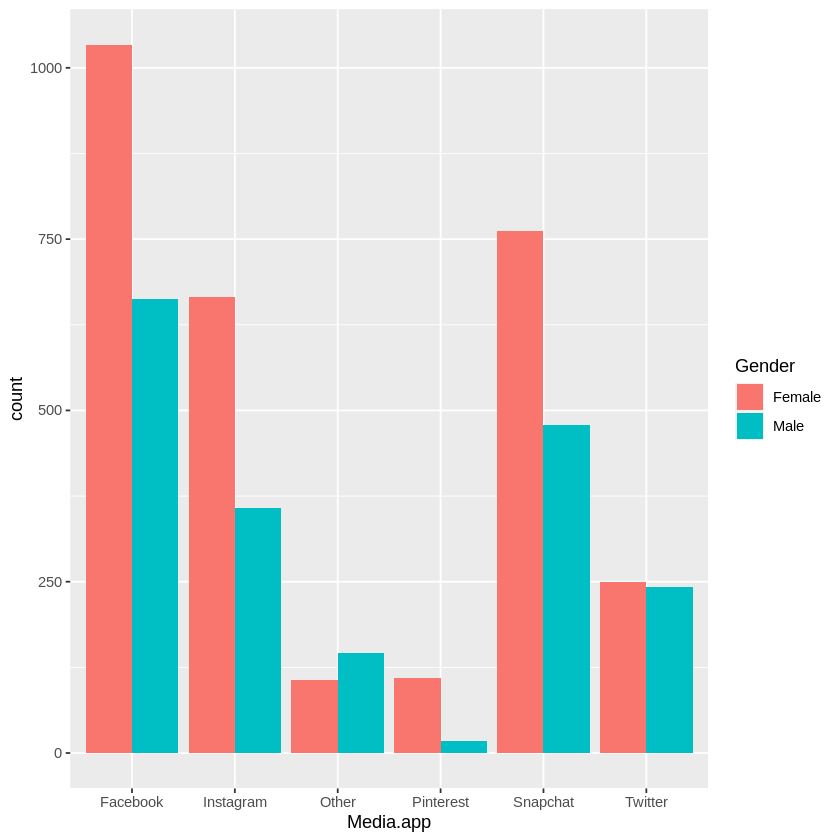

In [106]:
ggplot(
    df_social,
    aes(
        x=Media.app,
        fill=Gender
    )
) + geom_bar(position = 'dodge')

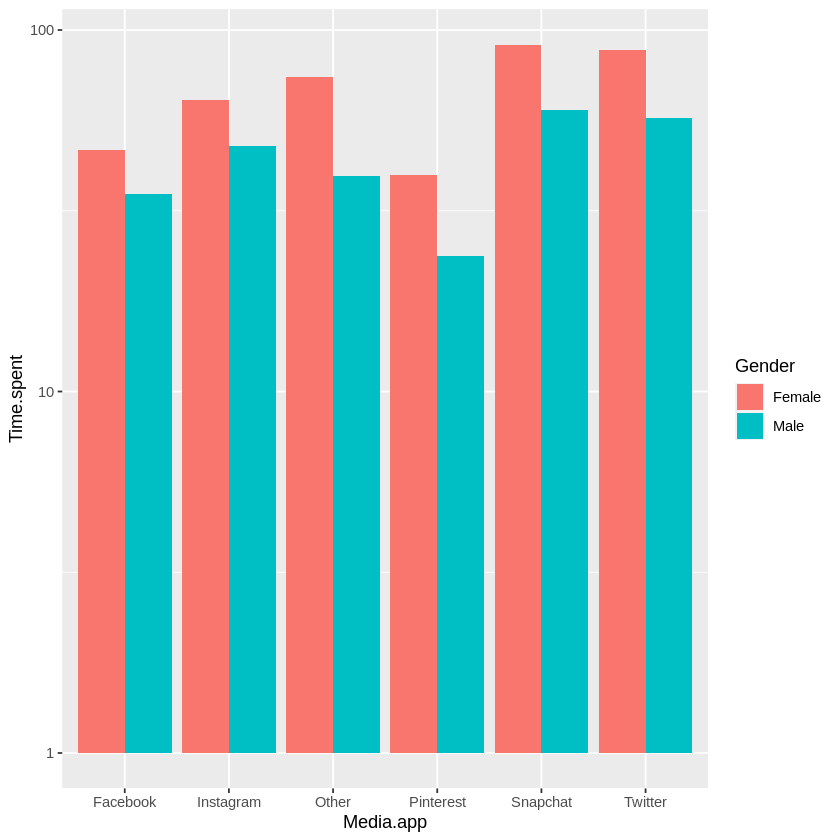

In [112]:
ggplot(
    df_social,
    aes(
        x = Media.app,
        y = Time.spent,
        fill = Gender
    )
) + scale_y_log10() + geom_bar(
    stat = 'summary',
    fun = mean,
    position = 'dodge'
)

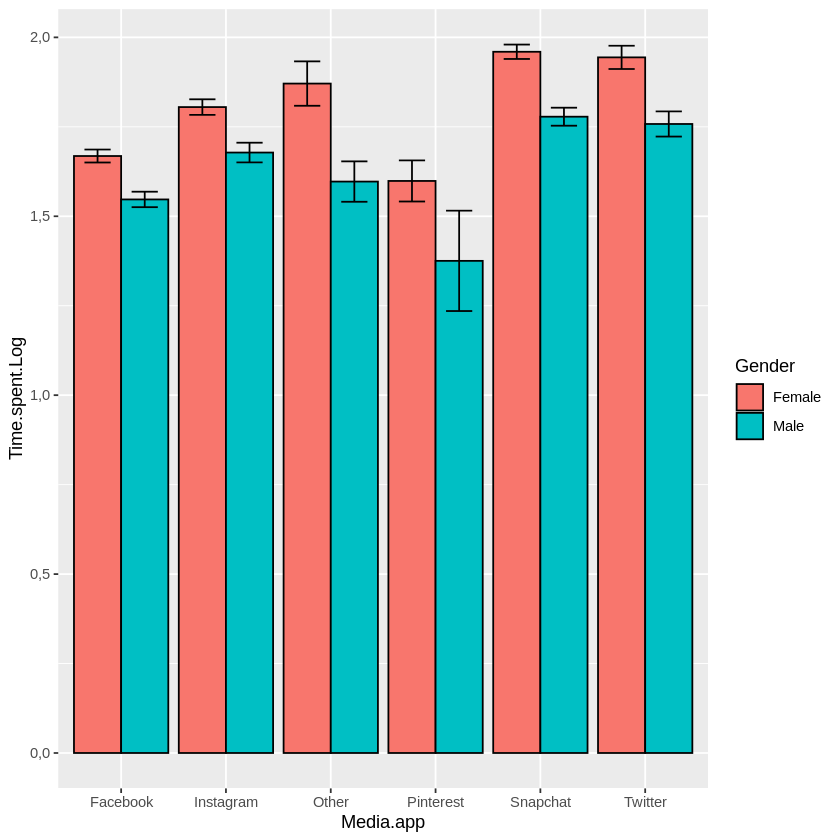

In [125]:
ggplot(
    df_social,
    aes(
        x = Media.app,
        y = Time.spent.Log,
        fill = Gender
    )
) + geom_bar(
    stat = 'summary',
    fun = mean,
    position = 'dodge',
    color='black'
) + stat_summary(
    fun.data = mean_se,
    geom = 'errorbar',
    position = position_dodge(width=0.9),
    width=0.5
)

In [126]:
fb_fem <- df_social[df_social$Media.app == 'Facebook' & df_social$Gender == 'Female', 'Time.spent.Log']
fb_fem

[1] 0,0000000 1,6020600 2,3802112 1,6532125 0,6020600 1,4771213 1,4771213
   [8] 1,9822712 2,2041200 2,5440680 0,6020600 1,7781513 1,6532125 1,7781513
  [15] 2,3802112 1,7781513 2,0000000 1,7781513 1,7781513 1,6532125 2,0791812
  [22] 2,2552725 1,1760913 1,3010300 2,6812412 1,6532125 1,0000000 0,4771213
  [29] 0,6020600 2,5563025 1,4771213 1,4771213 1,7781513 2,2552725 1,6020600
  [36] 1,7781513 1,3010300 2,0791812 1,4771213 1,0000000 1,4771213 1,3010300
  [43] 1,7781513 1,7781513 1,7781513 2,4771213 1,7781513 1,4771213 1,7781513
  [50] 2,0791812 1,1760913 1,4771213 0,3010300 2,4771213 1,1760913 1,9542425
  [57] 1,3010300 1,9542425 2,3802112 1,7781513 0,3010300 1,7781513 1,6532125
  [64] 2,4771213 0,6989700 0,9030900 1,7781513 3,0000000 2,3802112 1,7781513
  [71] 2,0791812 1,7781513 2,0791812 1,4771213 1,9294189 1,7781513 2,0791812
  [78] 1,4771213 2,3010300 1,7781513 1,6532125 1,1760913 2,0791812 2,0791812
  [85] 2,0791812 1,7781513 1,9542425 1,3010300 1,7781513 1,6532125 1,0000000
  [92] 1,3010300 2,0791812 2,3010300 1,4771213 1,9030900 1,3010300 1,4771213
  [99] 1,1760913 2,2552725 1,0000000 1,1760913 2,0000000 1,7781513 1,7781513
 [106] 2,0791812 1,7781513 2,3010300 0,3010300 1,7781513 2,2552725 1,4771213
 [113] 1,6532125 2,3802112 1,7781513 1,7781513 1,3010300 2,0791812 1,4771213
 [120] 1,9542425 1,0000000 1,3979400 1,7781513 2,4771213 0,0000000 2,0791812
 [127] 1,9542425 1,7781513 1,7781513 1,0000000 1,7781513 1,0000000 2,0791812
 [134] 1,7781513 2,6989700 1,7781513 1,6532125 1,1760913 1,3010300 1,4771213
 [141] 2,0791812 1,4771213 1,7781513 1,0000000 2,0791812 1,7781513 2,0791812
 [148] 1,6020600 1,4771213 1,7781513 1,7781513 2,0791812 1,7781513 2,2552725
 [155] 0,3010300 2,2552725 1,4771213 1,7781513 1,3010300 0,0000000 1,7781513
 [162] 1,1760913 1,9542425 1,4771213 1,7781513 0,3010300 0,6020600 1,4771213
 [169] 1,0000000 1,4771213 2,2552725 2,6989700 0,3010300 1,6532125 1,1760913
 [176] 1,9294189 1,4771213 1,3010300 1,7781513 1,3979400 0,3010300 1,7781513
 [183] 1,7781513 1,0000000 0,6989700 1,9030900 1,9542425 2,2552725 1,6532125
 [190] 3,0000000 2,0791812 1,3010300 1,0000000 1,4771213 1,4771213 1,7781513
 [197] 1,7781513 1,6532125 1,3010300 2,0791812 1,7781513 1,9542425 1,7781513
 [204] 2,4771213 2,0791812 1,9542425 1,7781513 1,7781513 2,3010300 0,6989700
 [211] 2,0791812 1,7781513 2,2552725 1,9542425 1,7781513 1,4771213 2,4771213
 [218] 1,4771213 1,4771213 1,4771213 1,7781513 2,3802112 1,1760913 0,0000000
 [225] 1,7781513 1,0000000 1,7781513 1,3010300 1,3010300 1,7781513 1,9542425
 [232] 2,0791812 0,3010300 2,4771213 1,7781513 0,3010300 1,7781513 0,6989700
 [239] 1,7781513 2,3010300 1,6532125 1,7781513 2,2041200 1,0000000 1,4771213
 [246] 2,0791812 1,9542425 1,9542425 2,3802112 1,0000000 2,0791812 2,0791812
 [253] 1,3010300 1,7781513 1,4771213 1,7781513 1,7781513 2,3802112 1,7781513
 [260] 2,2552725 1,7781513 1,3010300 2,4771213 1,7781513 1,1760913 1,4771213
 [267] 1,7781513 1,8450980 1,6532125 1,9542425 1,7781513 2,2552725 2,2552725
 [274] 2,0969100 1,6989700 1,4771213 1,1760913 1,4771213 1,3010300 1,7781513
 [281] 1,7781513 1,3979400 2,0791812 1,6020600 1,4771213 2,0791812 2,9030900
 [288] 0,0000000 1,7781513 1,3010300 0,6989700 1,7781513 2,3802112 1,3010300
 [295] 1,3010300 0,4771213 1,7781513 0,3010300 2,0791812 2,0791812 1,0000000
 [302] 1,4771213 2,0791812 1,1760913 1,1760913 1,0000000 1,6020600 1,7781513
 [309] 1,4771213 1,6532125 1,7781513 1,3010300 1,7781513 1,4771213 1,6532125
 [316] 0,3010300 1,7781513 1,4771213 1,4771213 2,6989700 1,4771213 1,7781513
 [323] 1,3010300 1,3010300 0,3010300 1,4771213 2,2552725 2,0791812 1,6989700
 [330] 2,0791812 2,0791812 2,0791812 2,2552725 1,3010300 2,0791812 2,2552725
 [337] 1,9542425 1,7781513 2,6020600 0,6989700 1,4771213 3,0000000 2,3802112
 [344] 1,7781513 1,4771213 1,7781513 1,7781513 1,4771213 1,7781513 1,3010300
 [351] 1,4771213 1,4771213 3,0000000 1,0000000 2,3979400 1,3010300 1,6532125
 [358] 1,3010300 1,0000000 2,0791812 1,7781513 2,0791812 1,0000000 1,7781513

In [127]:
mean_se(fb_fem)

y,ymin,ymax
"1,668396","1,650284","1,686509"


In [130]:
my_fun <- function(x) {
    data.frame(
        y=median(x),
        ymin=quantile(x, 0.25),
        ymax=quantile(x, 0.75)
    )
}

my_fun(fb_fem)

,y,ymin,ymax
25%,"1,778151","1,477121","2,079181"


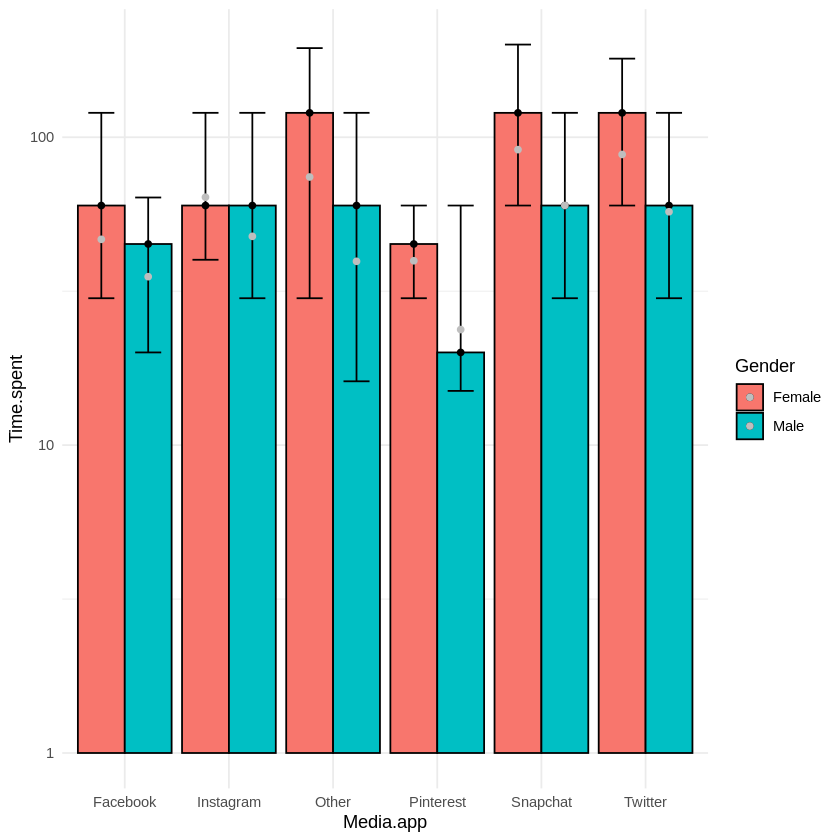

In [136]:
ggplot(
    df_social,
    aes(
        x = Media.app,
        y = Time.spent,
        fill = Gender
    )
) + scale_y_log10() + geom_bar(
    stat = 'summary',
    fun = median,
    position = 'dodge',
    color='black'
) + stat_summary(
    fun.data = my_fun,
    geom = 'errorbar',
    position = position_dodge(width=0.9),
    width=0.5
) + stat_summary(
    fun = median, 
    geom = 'point', 
    position = position_dodge(width=0.9)
) + stat_summary(
    fun = mean, 
    geom = 'point', 
    position = position_dodge(width=0.9),
    color = 'grey'
) + theme_mine()